In [1]:
import warnings
warnings.filterwarnings('ignore')

from keras.layers import Input, Dense, Flatten, Dropout
from keras.models import Model

import numpy as np
import pandas as pd
import os

import random
from collections import deque
import matplotlib.pylab as plt

from sklearn.decomposition import PCA

Using TensorFlow backend.


# Imports of classes

In [2]:
from environment import ETFEnvironment, CryptoEnvironment
from agent import MinVarianceAgent, MaxSharpeAgent, MaxDecorrelationAgent, MaxReturnsAgent
from utils import *

In [3]:
N_ASSETS = 65 # 53
WINDOW_FIT = 180 # 252
WINDOW_HOLD = 90 # 252
env = CryptoEnvironment() # ETFEnvironment

# Reweighting process: PCA

In [12]:
from agent import PCAAgent

In [34]:
agent_pca = PCAAgent(N_ASSETS, allow_short=False, pc_id=0)

In [35]:
actions_equal, actions_pca = [], []
result_equal, result_pca = [], []

for i in range(WINDOW_FIT, len(env.data), WINDOW_HOLD):
    
    state = env.get_state(i, WINDOW_FIT, is_cov_matrix=False)
    
    action_equal = np.ones(N_ASSETS) / N_ASSETS
    action_pca = agent_pca.act(state)
 
    state_action = env.get_state(i+WINDOW_HOLD, WINDOW_HOLD, is_cov_matrix=False)
    
    r = np.dot(state_action, action_equal)
    result_equal.append(r.tolist())
    actions_equal.append(action_equal)
    
    r = np.dot(state_action, action_pca)
    result_pca.append(r.tolist())
    actions_pca.append(action_pca)

# Evaluation

In [36]:
result_equal_vis = [item for sublist in result_equal for item in sublist]
result_pca_vis = [item for sublist in result_pca for item in sublist]

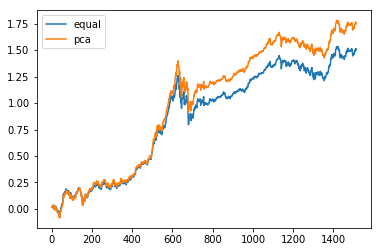

In [37]:
plt.figure()
plt.plot(np.array(result_equal_vis).cumsum(),label='equal')
plt.plot(np.array(result_pca_vis).cumsum(), label='pca')
plt.legend()
plt.show()

In [38]:
print('EQUAL', print_stats(result_equal_vis, result_equal_vis))
print('PCA', print_stats(result_pca_vis, result_equal_vis))

EQUAL [0.001, 0.0123, 1.2689, 0.0, 1.0]
PCA [0.0012, 0.0129, 1.4165, 0.0001, 1.0268]


# Visualization

In [10]:
import matplotlib
current_cmap = matplotlib.cm.get_cmap()

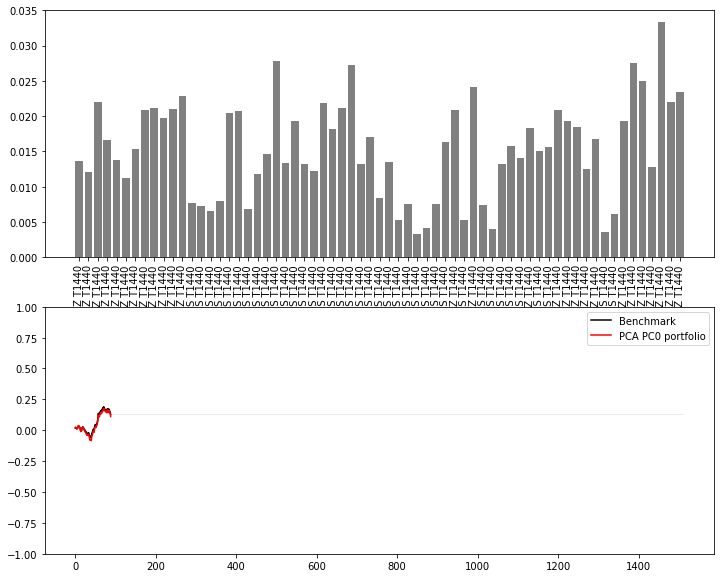

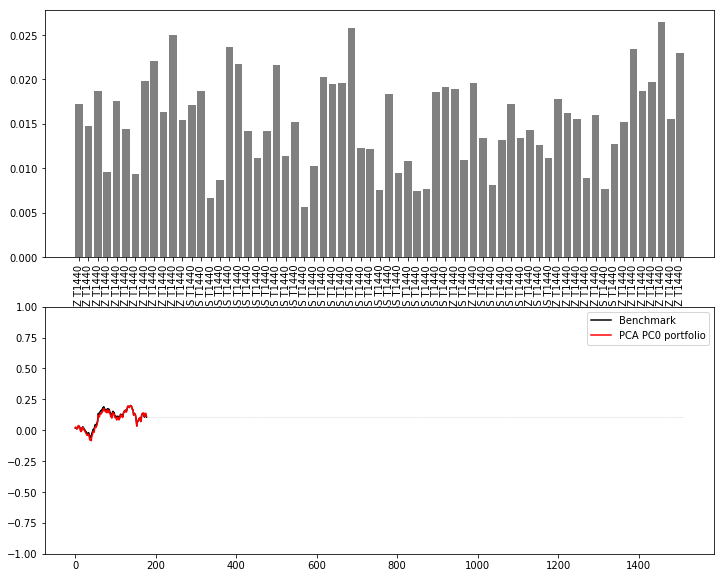

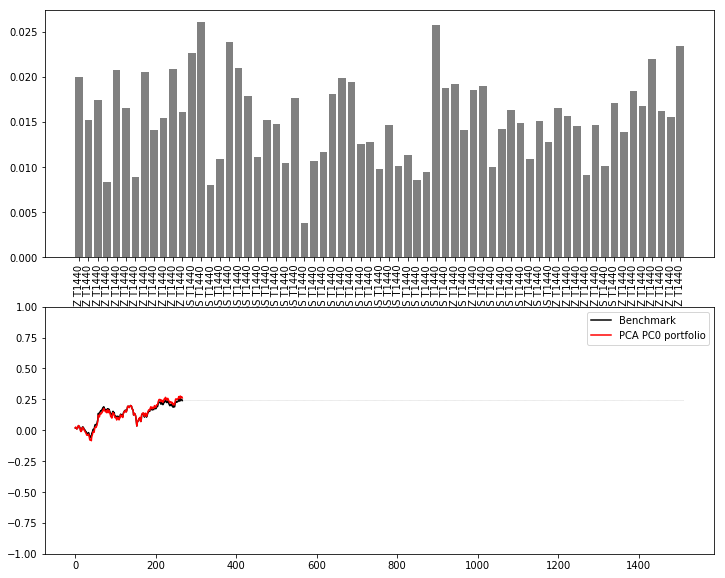

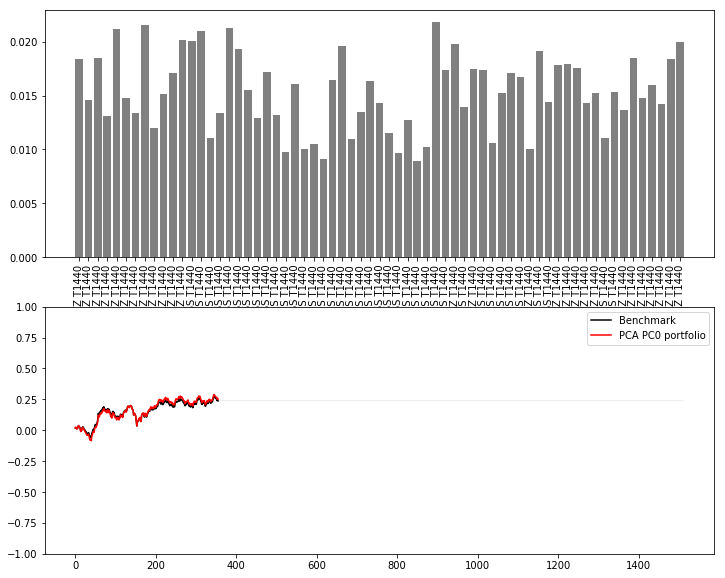

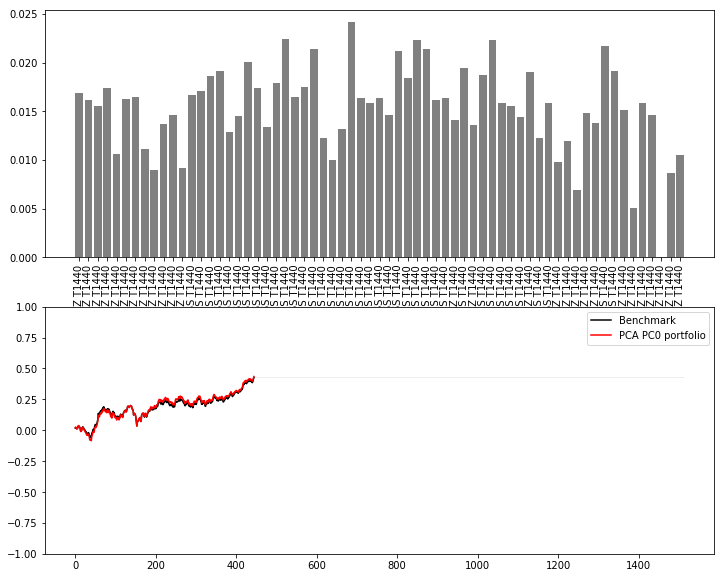

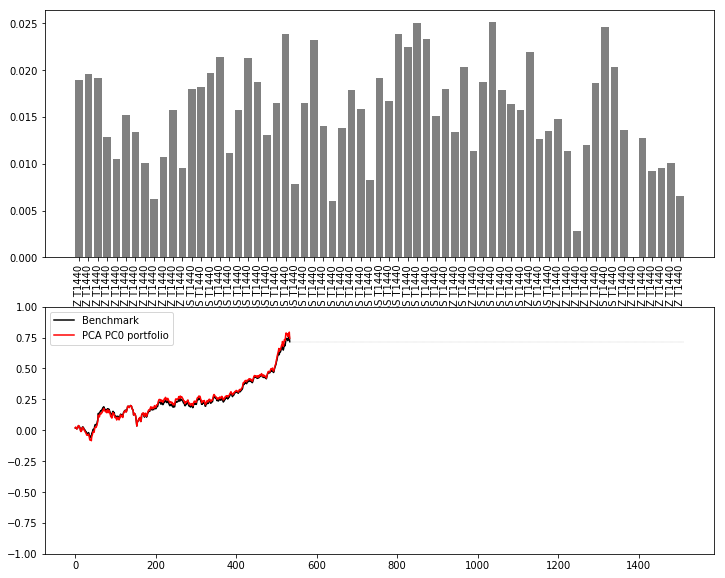

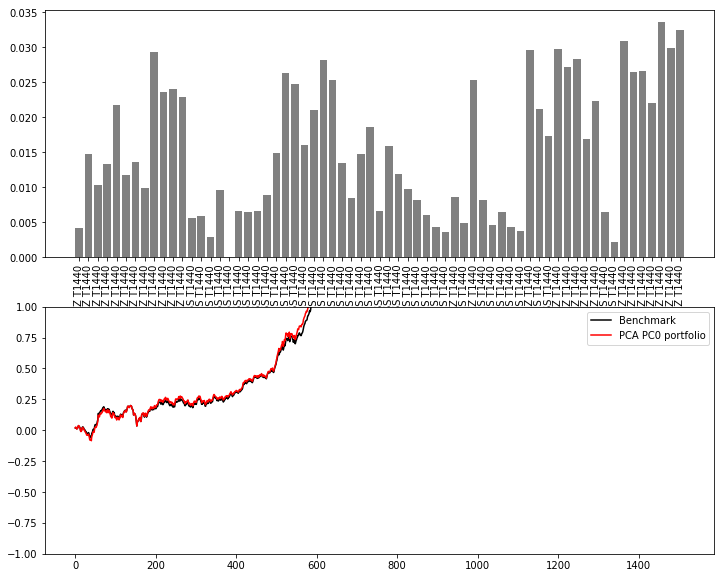

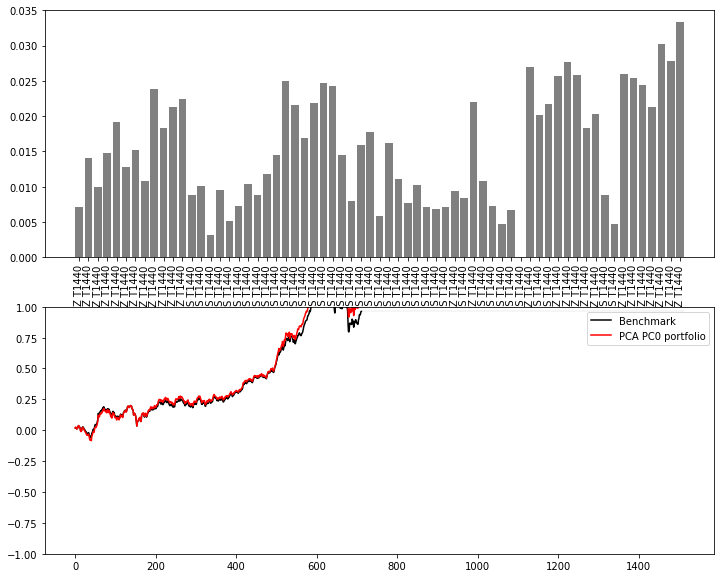

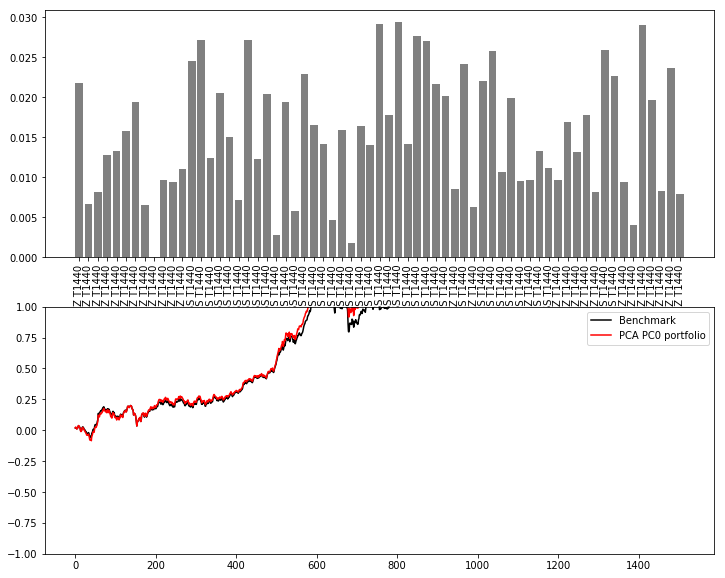

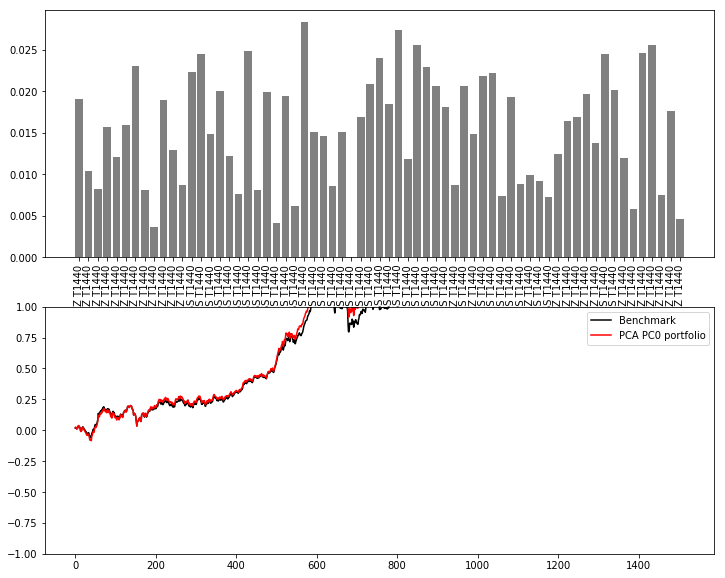

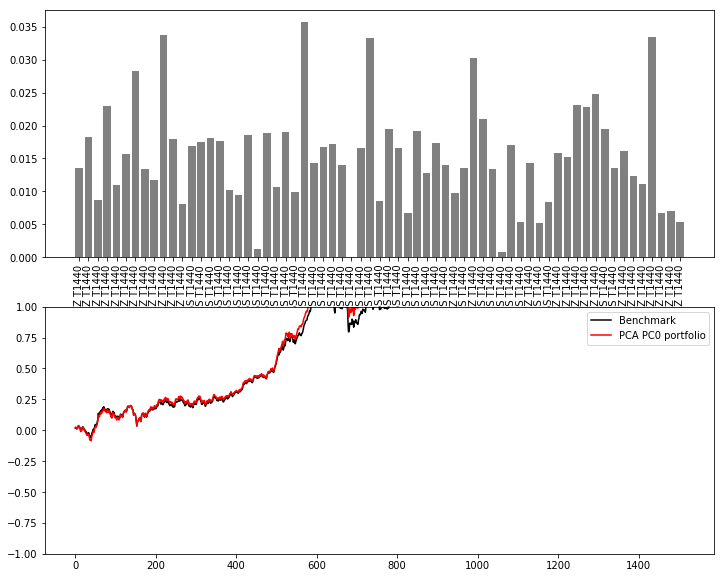

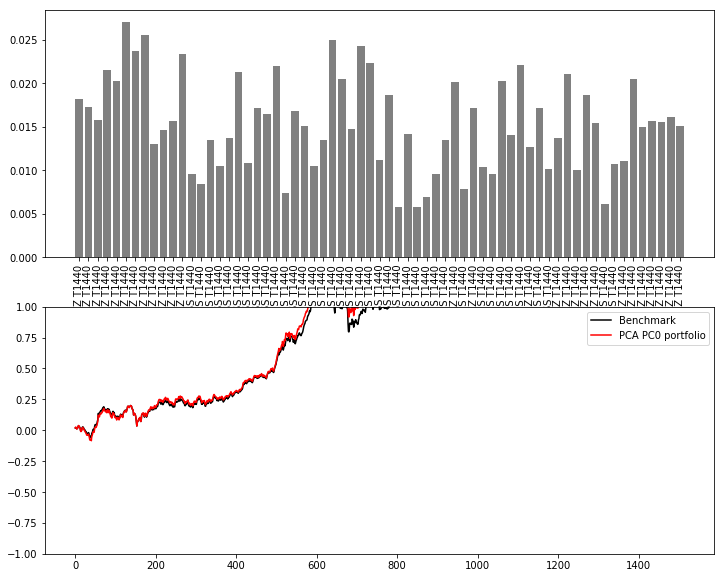

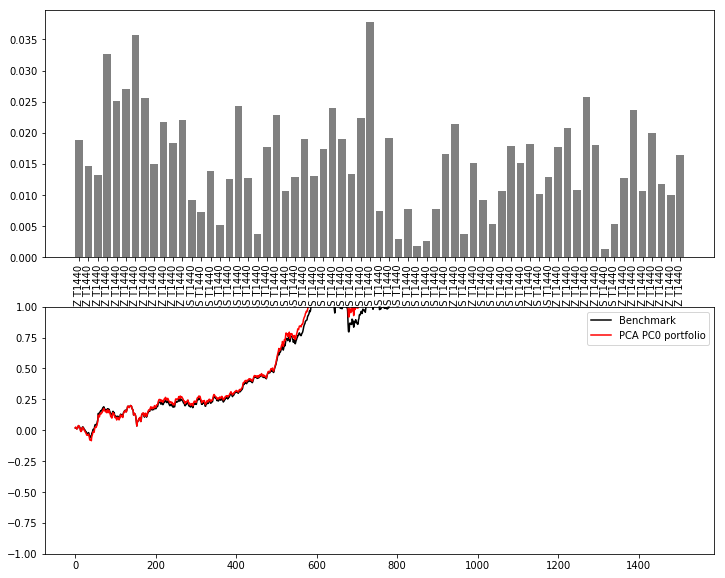

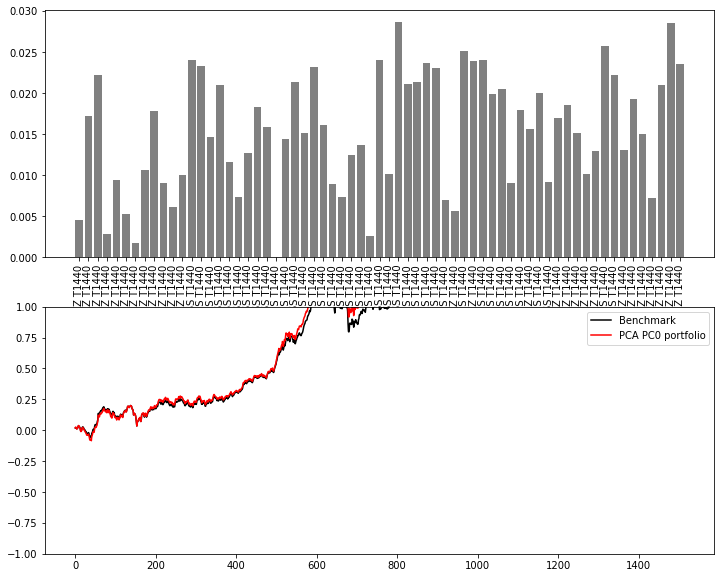

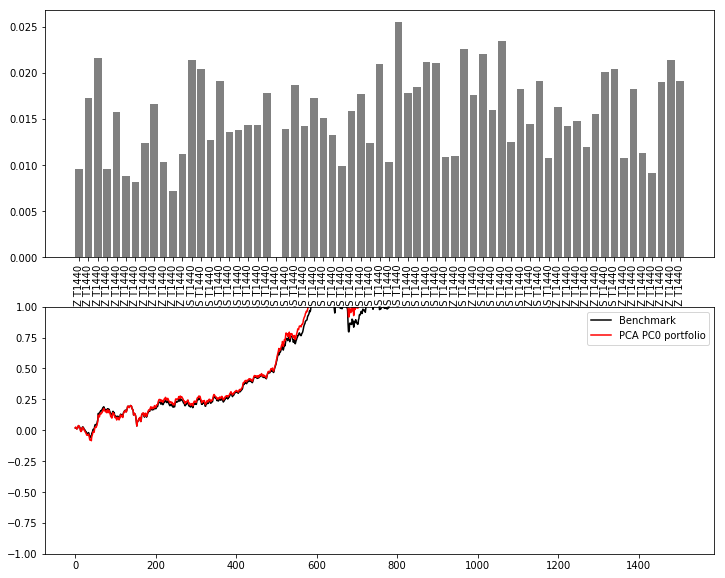

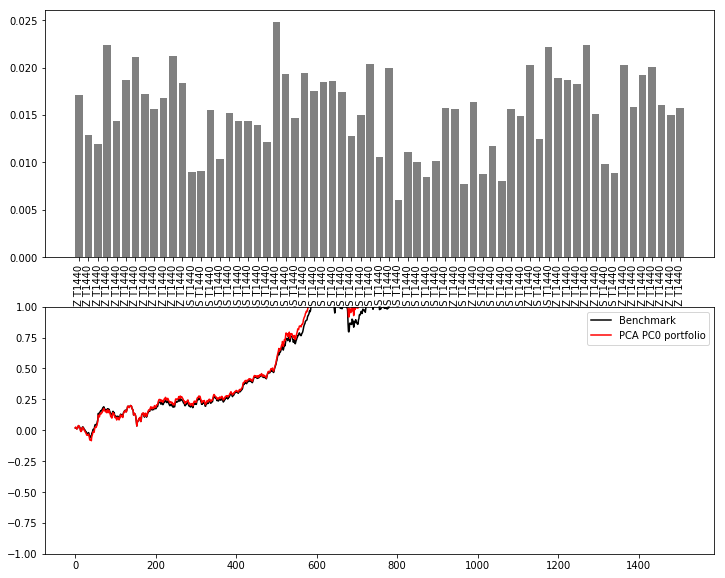

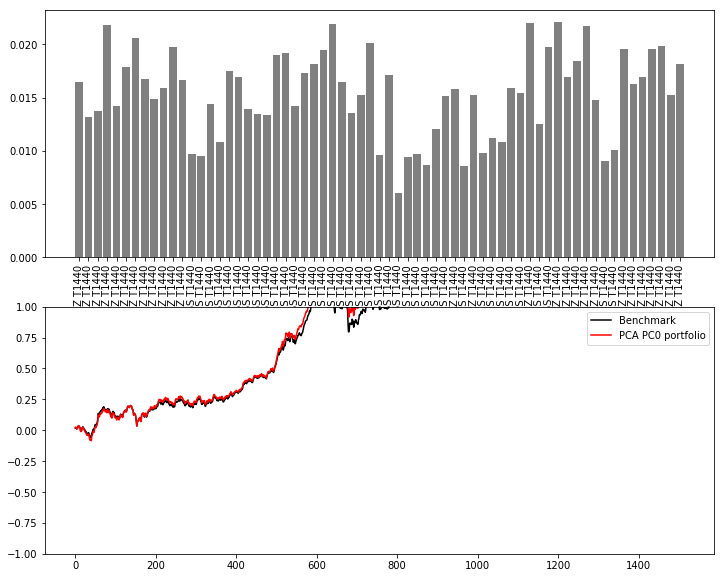

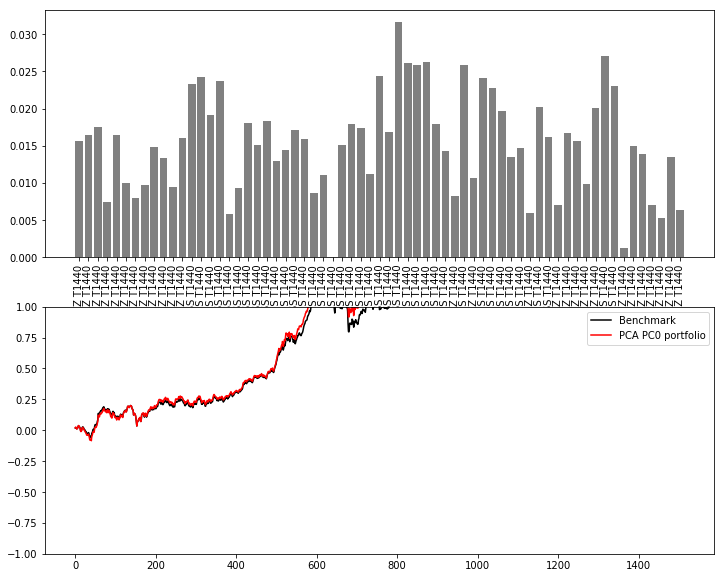

In [11]:
plot_results(result_equal, 
             result_pca, 
             actions_pca, 
             N_ASSETS,
             state.columns, 
             'PCA PC0 portfolio', './images/pca/', 'series')

# Making GIFs

In [45]:
import imageio
import glob

In [46]:
name = 'decorr'

In [47]:
filenames = sorted(glob.glob('./images/' + name + '/series*.jpg'))

In [48]:
filenames

['./images/decorr/series0.jpg',
 './images/decorr/series1.jpg',
 './images/decorr/series2.jpg']

In [49]:
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('./images/' + name + '_gif.gif', images, duration=0.5)